In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("api_data_aadhar_demographic_0_500000.csv")
df2= pd.read_csv("api_data_aadhar_demographic_500000_1000000.csv")
df3 =pd.read_csv("api_data_aadhar_demographic_1000000_1500000.csv")
df4= pd.read_csv("api_data_aadhar_demographic_1500000_2000000.csv")
df5= pd.read_csv("api_data_aadhar_demographic_2000000_2071700.csv")


In [3]:
df = pd.concat([df1,df2,df3,df4,df5],ignore_index= True)

In [4]:
df.to_csv("Demographic_combined.csv", index=False)

In [5]:
df['state'].value_counts()

state
Andhra Pradesh          207687
Tamil Nadu              196857
West Bengal             168623
Uttar Pradesh           167889
Maharashtra             162242
                         ...  
Jaipur                       2
Madanapalle                  2
Puttenahalli                 1
Nagpur                       1
Raja Annamalai Puram         1
Name: count, Length: 65, dtype: int64

In [6]:
df['state'] = (
    df['state']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace('&', 'and')
    .str.replace(r'\s+', ' ', regex=True)
)


In [7]:
df['state'].unique()

array(['uttar pradesh', 'andhra pradesh', 'gujarat', 'rajasthan',
       'karnataka', 'west bengal', 'telangana', 'odisha', 'maharashtra',
       'kerala', 'bihar', 'tamil nadu', 'madhya pradesh', 'assam',
       'tripura', 'arunachal pradesh', 'punjab', 'jharkhand', 'delhi',
       'chandigarh', 'chhattisgarh', 'jammu and kashmir', 'mizoram',
       'nagaland', 'himachal pradesh', 'goa', 'haryana', 'meghalaya',
       'uttarakhand', 'manipur', 'daman and diu', 'puducherry', 'sikkim',
       'ladakh', 'dadra and nagar haveli and daman and diu',
       'dadra and nagar haveli', 'orissa', 'pondicherry',
       'andaman and nicobar islands', 'lakshadweep', 'westbengal',
       'west bangal', 'chhatisgarh', 'west bengli', 'darbhanga',
       'puttenahalli', 'balanagar', 'uttaranchal', '100000', 'jaipur',
       'madanapalle', 'nagpur', 'raja annamalai puram'], dtype=object)

In [8]:
df

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,uttar pradesh,Gorakhpur,273213,49,529
1,01-03-2025,andhra pradesh,Chittoor,517132,22,375
2,01-03-2025,gujarat,Rajkot,360006,65,765
3,01-03-2025,andhra pradesh,Srikakulam,532484,24,314
4,01-03-2025,rajasthan,Udaipur,313801,45,785
...,...,...,...,...,...,...
2071695,29-12-2025,west bengal,West Midnapore,721212,0,12
2071696,29-12-2025,west bengal,West Midnapore,721420,0,1
2071697,29-12-2025,west bengal,West Midnapore,721424,0,5
2071698,29-12-2025,west bengal,West Midnapore,721426,0,3


In [9]:
state_map = {
    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu and Kashmir',

    # Andaman & Nicobar
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',

    # Dadra & Nagar Haveli and Daman & Diu (merged UT)
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman & diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu':'Dadra and Nagar Haveli and Daman and Diu',
     'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu':'Dadra and Nagar Haveli and Daman and Diu',
    'The Dadra And Nagar Haveli And Daman And Diu':'Dadra and Nagar Haveli and Daman and Diu',

    

    # Odisha (old name)
    'orissa': 'Odisha',

    # Capital formatting fixes
    'jammu and kashmir ': 'Jammu and Kashmir',

    # west bengal
     'west bengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'westbengal': 'West Bengal',
    'West Bengli': 'West Bengal',

    # Pondicherry
    'Puducherry':'Pondicherry'
}
df['state_cleaned'] = df['state'].replace(state_map)
df = df[~df['state_cleaned'].str.isnumeric()]
df['state'] = df['state_cleaned'].str.title()



C:\Users\HP\AppData\Local\Temp\ipykernel_24008\3312841820.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['state_cleaned'].str.title()


In [10]:
df

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_cleaned
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529,uttar pradesh
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375,andhra pradesh
2,01-03-2025,Gujarat,Rajkot,360006,65,765,gujarat
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314,andhra pradesh
4,01-03-2025,Rajasthan,Udaipur,313801,45,785,rajasthan
...,...,...,...,...,...,...,...
2071695,29-12-2025,West Bengal,West Midnapore,721212,0,12,West Bengal
2071696,29-12-2025,West Bengal,West Midnapore,721420,0,1,West Bengal
2071697,29-12-2025,West Bengal,West Midnapore,721424,0,5,West Bengal
2071698,29-12-2025,West Bengal,West Midnapore,721426,0,3,West Bengal


In [11]:
df['state'].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu And Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur',
       'Dadra And Nagar Haveli And Daman And Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Pondicherry', 'Andaman And Nicobar Islands',
       'Lakshadweep', 'Chhatisgarh', 'West Bengli', 'Darbhanga',
       'Puttenahalli', 'Balanagar', 'Uttaranchal', 'Jaipur',
       'Madanapalle', 'Nagpur', 'Raja Annamalai Puram'], dtype=object)

In [12]:
drop_void_state = ['Darbhanga','Puttenahalli', 'Balanagar',
       'Uttaranchal', 'Jaipur', 'Madanapalle', 'Nagpur',
       'Raja Annamalai Puram']

df = df[~df['state'].isin(drop_void_state)]


In [13]:
df['state'].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu And Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur',
       'Dadra And Nagar Haveli And Daman And Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Pondicherry', 'Andaman And Nicobar Islands',
       'Lakshadweep', 'Chhatisgarh', 'West Bengli'], dtype=object)

In [15]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')


# Create time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()

C:\Users\HP\AppData\Local\Temp\ipykernel_24008\2974774905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
C:\Users\HP\AppData\Local\Temp\ipykernel_24008\2974774905.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_24008\2974774905.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [16]:
df['Age_5-17']=df['demo_age_5_17']
df['Age_17+']= df['demo_age_17_']

C:\Users\HP\AppData\Local\Temp\ipykernel_24008\914125930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_5-17']=df['demo_age_5_17']
C:\Users\HP\AppData\Local\Temp\ipykernel_24008\914125930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_17+']= df['demo_age_17_']


In [17]:
df

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_cleaned,year,month,Age_5-17,Age_17+
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,uttar pradesh,2025,March,49,529
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,andhra pradesh,2025,March,22,375
2,2025-03-01,Gujarat,Rajkot,360006,65,765,gujarat,2025,March,65,765
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,andhra pradesh,2025,March,24,314
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,rajasthan,2025,March,45,785
...,...,...,...,...,...,...,...,...,...,...,...
2071695,2025-12-29,West Bengal,West Midnapore,721212,0,12,West Bengal,2025,December,0,12
2071696,2025-12-29,West Bengal,West Midnapore,721420,0,1,West Bengal,2025,December,0,1
2071697,2025-12-29,West Bengal,West Midnapore,721424,0,5,West Bengal,2025,December,0,5
2071698,2025-12-29,West Bengal,West Midnapore,721426,0,3,West Bengal,2025,December,0,3


# Demographic Updates Trend Over Time

In [18]:
df['Total_updates']=df[['Age_5-17','Age_17+']].sum(axis=1)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_24008\422344152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_updates']=df[['Age_5-17','Age_17+']].sum(axis=1)


,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_cleaned,year,month,Age_5-17,Age_17+,Total_updates
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,uttar pradesh,2025,March,49,529,578
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,andhra pradesh,2025,March,22,375,397
2,2025-03-01,Gujarat,Rajkot,360006,65,765,gujarat,2025,March,65,765,830
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,andhra pradesh,2025,March,24,314,338
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,rajasthan,2025,March,45,785,830
...,...,...,...,...,...,...,...,...,...,...,...,...
2071695,2025-12-29,West Bengal,West Midnapore,721212,0,12,West Bengal,2025,December,0,12,12
2071696,2025-12-29,West Bengal,West Midnapore,721420,0,1,West Bengal,2025,December,0,1,1
2071697,2025-12-29,West Bengal,West Midnapore,721424,0,5,West Bengal,2025,December,0,5,5
2071698,2025-12-29,West Bengal,West Midnapore,721426,0,3,West Bengal,2025,December,0,3,3


In [19]:
month_order = [
    'March','April','May','June',
    'July','September','October','November','December'
]

df['month'] = pd.Categorical(
    df['month'],
    categories=month_order,
    ordered=True
)

monthly_trend = (
    df.groupby('month',observed=False)['Total_updates']
      .sum()
      .reset_index()
      .sort_values('month')
)

print(monthly_trend)

       month  Total_updates
0      March       11147558
1      April        1515672
2        May        1566287
3       June        1685562
4       July        2220715
5  September        7324060
6    October        5010966
7   November        9387601
8   December        9436748


C:\Users\HP\AppData\Local\Temp\ipykernel_24008\480423283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.Categorical(


           Age_5-17   Age_17+
month                        
March        976095  10171463
April        198744   1316928
May          204893   1361394
June         197767   1487795
July         288449   1932266
September    770788   6553272
October      479232   4531734
November     821273   8566328
December     926183   8510565


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1500x600 with 0 Axes>

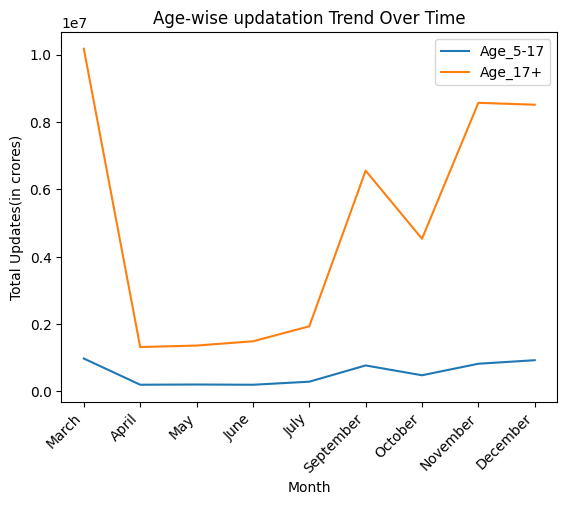

In [20]:
age_trend = df.groupby('month',observed=False)[['Age_5-17','Age_17+']].sum()
print(age_trend)

plt.figure(figsize=(15,6))
age_trend.plot()
plt.xlabel("Month")
plt.xticks(rotation=45, ha='right')

plt.ylabel("Total Updates(in crores)")
plt.title("Age-wise updatation Trend Over Time")
plt.show()


# State-wise Aadhar updation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

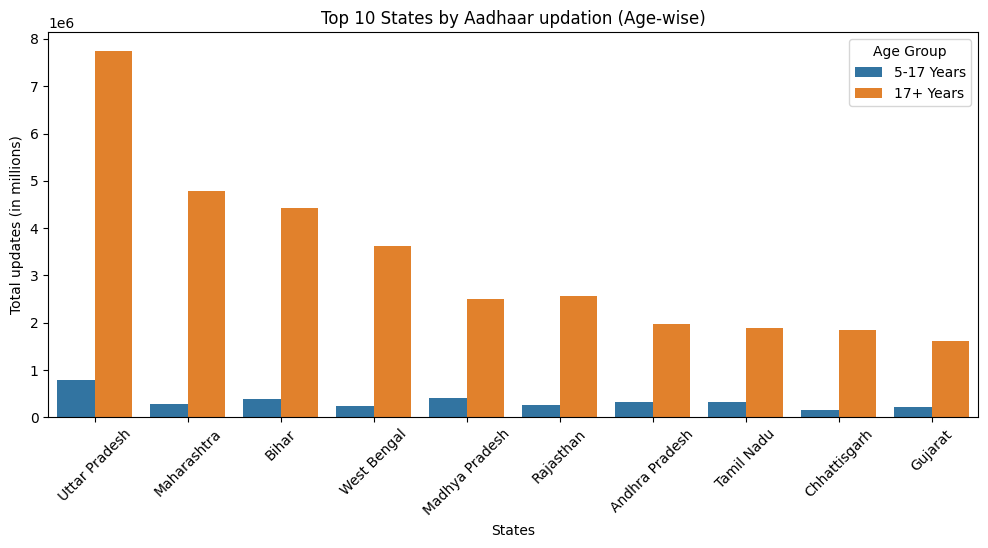

In [21]:
top_states = (
    df.groupby('state')['Total_updates']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

state_order = top_states.index.tolist()
df_top = df[df['state'].isin(state_order)]
age_state = (
    df_top.groupby('state')[['Age_5-17','Age_17+']]
    .sum()
    .reset_index()
)
age_state_melted = age_state.melt(
    id_vars='state',
    value_vars=['Age_5-17','Age_17+'],
    var_name='age_group',
    value_name='updates'
)
age_state_melted['age_group'] = age_state_melted['age_group'].map({
    'Age_5-17': '5-17 Years',
    'Age_17+': '17+ Years',
    
})

age_state_melted['state'] = pd.Categorical(
    age_state_melted['state'],
    categories=state_order,
    ordered=True
)


#  Plot
plt.figure(figsize=(12,5))

sns.barplot(
    data=age_state_melted,
    x='state',
    y='updates',
    hue='age_group'
)

plt.xlabel("States")
plt.ylabel("Total updates (in millions)")
plt.title("Top 10 States by Aadhaar updation (Age-wise)")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.show()


# District-Level Anomaly Detection

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

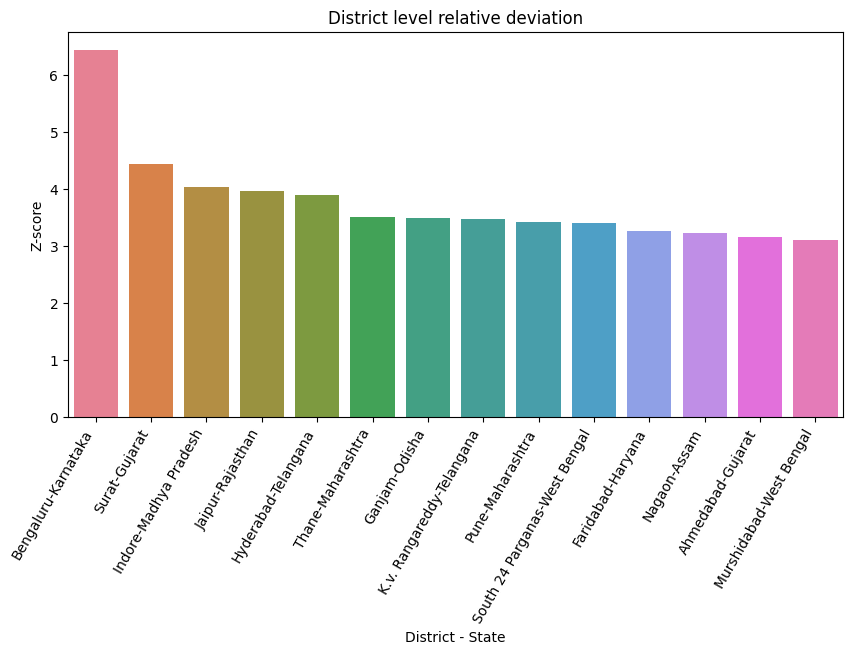

In [25]:
district_state_avg = (
    df.groupby(['state', 'district'])['Total_updates']
    .sum()
    .reset_index()
)

district_state_avg['state_mean'] = (
    district_state_avg.groupby('state')['Total_updates']
    .transform('mean')
)

district_state_avg['state_std'] = (
    district_state_avg.groupby('state')['Total_updates']
    .transform('std')
)

district_state_avg['z_within_state'] = (
    (district_state_avg['Total_updates'] - district_state_avg['state_mean']) /
    district_state_avg['state_std']
)

anomalies_district=district_state_avg[district_state_avg['z_within_state'] > 3]
anomalies_district=anomalies_district.sort_values('z_within_state',ascending = False)
anomalies_district['state_district'] = anomalies_district['district'] + "-" + anomalies_district['state']


plt.figure(figsize = (10,5))
sns.barplot(data = anomalies_district,
            x ='state_district',
            y ='z_within_state',
            hue = 'state_district',
            legend = False)
plt.title("District level relative deviation")
plt.xticks(rotation=60, ha='right')
plt.xlabel("District - State")
plt.ylabel("Z-score")
plt.show()

